In [41]:
import numpy as np 
import pandas as pd

In [42]:
df = pd.read_csv("PA_dataset.csv")
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,NEGATIVE,YES
1,0.0,13.0,3250.0,28.0,NEGATIVE,YES
2,?,?,4000.0,35.0,NEGATIVE,YES
3,?,20.0,5000.0,45.0,NEGATIVE,YES
4,1.0,24.0,6000.0,77.0,NEGATIVE,NO


In [43]:
# How many samples are there in the dataset ? 
df.shape

(748, 6)

In [44]:
# How many input features are there in the dataset ?
# 5

In [45]:
# What type of problem is this?
# Classification

In [46]:
# Which of the features has least variance?
#  [Hint: Ignore/remove missing values if any. Are there any categorical features?]
df.isnull().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
Target    0
dtype: int64

In [47]:
df['V1'].unique()

array(['2.0', '0.0', '?', '1.0', '4.0', '5.0', '9.0', '3.0', '12.0',
       '6.0', '11.0', '10.0', '13.0', '8.0', '14.0', '7.0', '16.0',
       '15.0', '23.0', '21.0', '18.0', '22.0', '26.0', '35.0', '38.0',
       '40.0', '74.0', '20.0', '17.0', '25.0', '39.0', '72.0'],
      dtype=object)

In [48]:
df = df.replace("?", np.nan)

In [49]:
df.isnull().sum()

V1        5
V2        5
V3        0
V4        0
V5        0
Target    0
dtype: int64

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      743 non-null    object 
 1   V2      743 non-null    object 
 2   V3      748 non-null    float64
 3   V4      748 non-null    float64
 4   V5      748 non-null    object 
 5   Target  748 non-null    object 
dtypes: float64(2), object(4)
memory usage: 35.2+ KB


In [51]:
df[['V1', 'V2']] = df[['V1', 'V2']].astype(float)

In [52]:
df.describe()

,V1,V2,V3,V4
count,743.000000,743.000000,748.000000,748.000000
mean,9.562584,5.464334,1378.676471,34.282086
std,8.093527,5.799759,1459.826781,24.376714
min,0.000000,1.000000,250.000000,2.000000
25%,3.000000,2.000000,500.000000,16.000000
50%,8.000000,4.000000,1000.000000,28.000000
75%,14.000000,7.000000,1750.000000,50.000000
max,74.000000,50.000000,12500.000000,98.000000


In [53]:
variance = df[['V1', 'V2', 'V3', 'V4']].var()
variance

V1    6.550517e+01
V2    3.363720e+01
V3    2.131094e+06
V4    5.942242e+02
dtype: float64

In [54]:
variance.min()

np.float64(33.637203295447534)

In [55]:
df['V5'].unique()

array(['NEGATIVE'], dtype=object)

In [66]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df['V5']=oe.fit_transform(df[['V5']])

In [68]:
df['Target'] = oe.fit_transform(df[['Target']])

In [69]:
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,0.0,1.0
1,0.0,13.0,3250.0,28.0,0.0,1.0
2,NaN,NaN,4000.0,35.0,0.0,1.0
3,NaN,20.0,5000.0,45.0,0.0,1.0
4,1.0,24.0,6000.0,77.0,0.0,0.0


<Axes: >

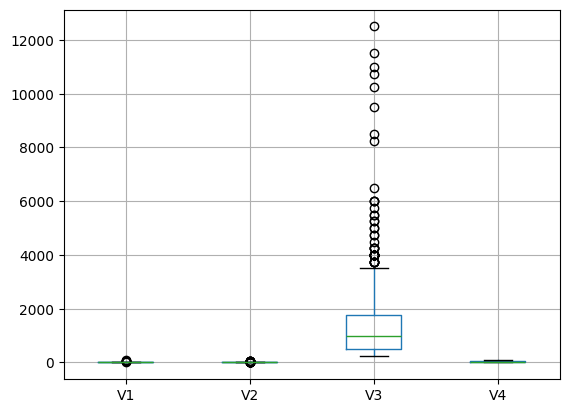

In [61]:
# Which of the following features has least number of outliers?
#   [Hint: Which visualization marks outliers? Ignore/remove missing values if any]

import matplotlib.pyplot as plt 
import seaborn as sns
df.boxplot()


In [90]:
# Function to calculate outliers using IQR
def count_outliers_IQR(column):
    Q1 = column.quantile(0.25)  # First quartile (25th percentile)
    Q3 = column.quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1               # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Count outliers below and above bounds
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return len(outliers)

# Apply the function to each column
outlier_counts = df.apply(count_outliers_IQR)

# Identify the variable with the least and most outliers
least_outlier_col = outlier_counts.idxmin()
most_outlier_col = outlier_counts.idxmax()

# Print results
print("Outlier counts per column:")
print(outlier_counts)
print(f"\nColumn with least outliers: {least_outlier_col} ({outlier_counts[least_outlier_col]} outliers)")
print(f"Column with most outliers: {most_outlier_col} ({outlier_counts[most_outlier_col]} outliers)")

Outlier counts per column:
V1          7
V2         42
V3         45
V4          0
V5          0
Target    178
dtype: int64

Column with least outliers: V4 (0 outliers)
Column with most outliers: Target (178 outliers)


In [71]:
df.head()

,V1,V2,V3,V4,V5,Target
0,2.0,50.0,12500.0,98.0,0.0,1.0
1,0.0,13.0,3250.0,28.0,0.0,1.0
2,NaN,NaN,4000.0,35.0,0.0,1.0
3,NaN,20.0,5000.0,45.0,0.0,1.0
4,1.0,24.0,6000.0,77.0,0.0,0.0


In [75]:
#Which of the following is true about target variable?
df['Target'].value_counts()

Target
0.0    570
1.0    178
Name: count, dtype: int64

In [76]:
# How many features have missing values in the dataset?
df.isnull().sum()

V1        5
V2        5
V3        0
V4        0
V5        0
Target    0
dtype: int64

In [81]:
# What is average of first feature (i.e. 'V1') after applyting SimpleImputer(strategy = 'median')?
from sklearn.impute import SimpleImputer
si = SimpleImputer
si(strategy='median').fit_transform(df[['V1']]).mean()

np.float64(9.552139037433156)

In [82]:
from sklearn.impute import KNNImputer
knn = KNNImputer
knn(n_neighbors=3).fit_transform(df[['V1']]).mean()

np.float64(9.562584118438762)

In [84]:
si(strategy='mean').fit_transform(df[['V2']]).mean()

np.float64(5.464333781965007)